In [1]:
import pandas as pd

In [2]:
import numpy as np
import datetime as dt

In [4]:
data=pd.read_excel('Online Retail.xlsx')

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
data=data[data['CustomerID'].notnull()]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
data['InvoiceDay']=data['InvoiceDate'].apply(lambda x: dt.datetime(x.year,x.month,x.day))
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [11]:
pin_date=max(data['InvoiceDay'])+dt.timedelta(1)
pin_date

Timestamp('2011-12-10 00:00:00')

In [13]:
data['TotalSum']=data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [14]:
rfm=data.groupby('CustomerID').agg({
    'InvoiceDay':lambda x: (pin_date-x.max()).days,
    'InvoiceNo':'count',
    'TotalSum':'sum'
})
rfm

,InvoiceDay,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [20]:
rfm=rfm.rename(columns={
    'InvoiceDay':'Recency',
    'InvoiceNo':'Frequency',
    'TotalSum':'monetary'
})

In [21]:
r_labels=range(4,0,-1)
r_groups=pd.qcut(rfm['Recency'],q=4,labels=r_labels)
f_labels=range(1,5)
f_groups=pd.qcut(rfm['Frequency'],q=4,labels=f_labels)
m_labels=range(1,5)
m_groups=pd.qcut(rfm['monetary'],q=4,labels=m_labels)

In [22]:
rfm['R']=r_groups.values
rfm['F']=f_groups.values
rfm['M']=m_groups.values

In [23]:
rfm

,Recency,Frequency,monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [24]:
x=rfm[["R","F","M"]]

In [25]:
x

,R,F,M
CustomerID,,,
12346.0,1,1,1
12347.0,4,4,4
12348.0,2,2,4
12349.0,3,3,4
12350.0,1,1,2
...,...,...,...
18280.0,1,1,1
18281.0,1,1,1
18282.0,4,1,1


**KMEANS**

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans=KMeans(n_clusters=5 , init='k-means++' , max_iter=300)

In [30]:
kmeans.fit(x)

KMeans(n_clusters=5)

In [31]:
kmeans.labels_

array([2, 1, 3, ..., 4, 1, 1], dtype=int32)

In [32]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [33]:
rfm['kmeans-cluster']=kmeans.labels_

In [34]:
rfm

,Recency,Frequency,monetary,R,F,M,kmeans-cluster
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,2
12347.0,3,182,4310.00,4,4,4,1
12348.0,76,31,1797.24,2,2,4,3
12349.0,19,73,1757.55,3,3,4,1
12350.0,311,17,334.40,1,1,2,2
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,2
18281.0,181,7,80.82,1,1,1,2
18282.0,8,13,176.60,4,1,1,4


In [40]:
customers_g1=list(rfm[rfm['kmeans-cluster']==1].index)

In [45]:
customers_g1

[12347.0,
 12349.0,
 12356.0,
 12357.0,
 12359.0,
 12362.0,
 12364.0,
 12371.0,
 12380.0,
 12381.0,
 12388.0,
 12395.0,
 12397.0,
 12398.0,
 12406.0,
 12407.0,
 12408.0,
 12415.0,
 12417.0,
 12421.0,
 12423.0,
 12428.0,
 12429.0,
 12431.0,
 12432.0,
 12433.0,
 12437.0,
 12438.0,
 12444.0,
 12449.0,
 12451.0,
 12456.0,
 12462.0,
 12465.0,
 12471.0,
 12472.0,
 12473.0,
 12474.0,
 12476.0,
 12477.0,
 12480.0,
 12481.0,
 12483.0,
 12484.0,
 12488.0,
 12490.0,
 12494.0,
 12500.0,
 12517.0,
 12518.0,
 12523.0,
 12524.0,
 12526.0,
 12528.0,
 12536.0,
 12539.0,
 12540.0,
 12553.0,
 12557.0,
 12560.0,
 12562.0,
 12567.0,
 12569.0,
 12572.0,
 12578.0,
 12583.0,
 12584.0,
 12594.0,
 12597.0,
 12598.0,
 12600.0,
 12610.0,
 12613.0,
 12615.0,
 12619.0,
 12620.0,
 12621.0,
 12626.0,
 12627.0,
 12628.0,
 12630.0,
 12645.0,
 12646.0,
 12647.0,
 12656.0,
 12657.0,
 12662.0,
 12664.0,
 12668.0,
 12670.0,
 12674.0,
 12678.0,
 12680.0,
 12681.0,
 12682.0,
 12683.0,
 12684.0,
 12685.0,
 12700.0,
 12704.0,


In [61]:
top_products_g1= data.query('CustomerID in @customers_g1').groupby(['StockCode'])['InvoiceNo'].count().sort_values(ascending=False).head(10)

لیست 10 تا از کلاهای پرفروش گروه 1

In [62]:
top_products_g1

,InvoiceNo
StockCode,
85123A,1225
85099B,1223
22423,1183
20725,1061
23203,863
47566,858
20727,849
84879,818
22197,809


In [65]:
product_codes = top_products_g1.index.tolist()

In [66]:
product_codes

['85123A', '85099B', 22423, 20725, 23203, 47566, 20727, 84879, 22197, 22383]

In [68]:
customer=data.query('CustomerID in @customers_g1 and StockCode not in @product_codes')['CustomerID'].unique()

لیست مشتریان گروه 1 که 10 تا کالای پروفروش گروه 1 را خرید نکردند

In [69]:
customer

array([13047., 12583., 15291., ..., 16800., 13521., 15060.])

**wcss_score** *Elbow*

In [70]:
kmeans.inertia_

3783.080728075019

In [71]:
wcss={}
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=300)
  kmeans.fit(x)
  wcss[k]=kmeans.inertia_

In [72]:
import seaborn as sns

<Axes: >

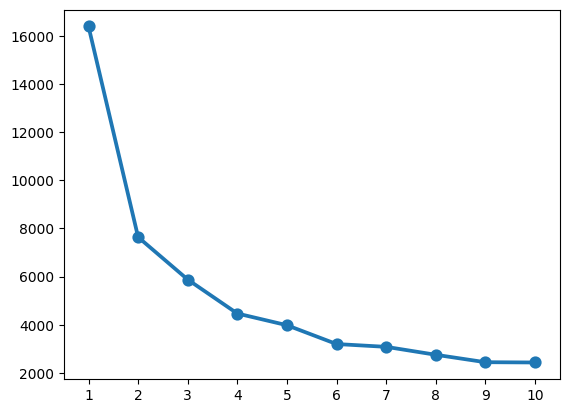

In [73]:
sns.pointplot(x=list(wcss.keys()) , y=list(wcss.values()))

**DBSCAN**

In [74]:
from sklearn.cluster import DBSCAN

In [76]:
dbscan=DBSCAN(eps=0.9 , min_samples=150)

In [77]:
dbscan.fit(x)

DBSCAN(eps=0.9, min_samples=150)

In [78]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [79]:
dbscan=DBSCAN(eps=0.9 , min_samples=200)

In [80]:
dbscan.fit(x)

DBSCAN(eps=0.9, min_samples=200)

In [81]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3])

In [83]:
rfm['dbscan_cluster']=dbscan.labels_

In [84]:
rfm

,Recency,Frequency,monetary,R,F,M,kmeans-cluster,dbscan_cluster
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,2,0
12347.0,3,182,4310.00,4,4,4,1,1
12348.0,76,31,1797.24,2,2,4,3,-1
12349.0,19,73,1757.55,3,3,4,1,-1
12350.0,311,17,334.40,1,1,2,2,-1
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,2,0
18281.0,181,7,80.82,1,1,1,2,0
18282.0,8,13,176.60,4,1,1,4,-1


In [97]:
rfm[rfm['dbscan_cluster']==-1]

,Recency,Frequency,monetary,R,F,M,kmeans-cluster,dbscan_cluster
CustomerID,,,,,,,,
12348.0,76,31,1797.24,2,2,4,3,-1
12349.0,19,73,1757.55,3,3,4,1,-1
12350.0,311,17,334.40,1,1,2,2,-1
12352.0,37,95,1545.41,3,3,3,3,-1
12354.0,233,58,1079.40,1,3,3,0,-1
...,...,...,...,...,...,...,...,...
18276.0,22,16,323.36,3,1,2,4,-1
18277.0,59,9,97.63,2,1,1,2,-1
18278.0,74,9,173.90,2,1,1,2,-1


**silhouette_score**

In [98]:
from sklearn.metrics import silhouette_score
silhouette_score(x,dbscan.labels_)

0.10191777541156684